In [21]:
# Center of Mass Position and Velocity                                                                                 

# import modules                                                                                                       
import numpy as np
import astropy.units as u
import pygadgetreader as pyg
import matplotlib.pyplot as plt


In [156]:
class CenterOfMass:

    def __init__(self,ptype):
        # Input:  Ptype is an integer 1,2 or 3 where 1, 2, 3 specify if you want disk, bulge or halo
        # read in the snapshot using pygadget reader 
        # and store positions and velocities and masses of the given particle type as arrays
        # you will need an if statement here to specify what gets loaded using pygadget reader
         
        if ptype == 1:
            a = "disk"
        elif ptype == 2:
            a = "bulge"
        elif ptype == 3:
            a = "dm"
        else:
            print ("invalid input")
        
        self.pos = pyg.readsnap("../sims/MW_1M_db_010", "pos", a)
        self.vel = pyg.readsnap("../sims/MW_1M_db_010",'vel', a)
        self.mass = pyg.readsnap("../sims/MW_1M_db_010", "mass", a)
        #properties of the object
        
        
    # EXAMPLE FUNCTION 
    def total_mass(self):
        # function that RETURNS THE TOTAL MASS OF THE DISK 
        # output: Mass is units of Msun
        # self allows you to call functions anytime without defining it again
        #Note: you can add other keyword arguments into the function, but 'self' must be first                         
        
        return np.sum(self.mass)*1e10
    
    
    def total_mass_inr(self, k):
        #function that RETURNS THE MASS OF THE DISK WITHIN A GIVEN RADIUS
        # we are using k to be able to ask for any radius that we want 
        # the function  np.where  is useful here.  
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]

        r_disk = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_disk[0]) 
        

        rindex = np.where(r_disk<k)[0]   
        # [0] forces the array into one columm
        #print (r_disk[rindex[0]]) # prints the value of r_disk for the first particle that has r< 20  
        #print (rindex[0]) # prints the index in the r_disk array of the first particle that has r < 20  
        #print (np.max(r_disk[rindex])) #prints the max value of the r_disk array that should have all particles with r < 20
        # check that max should be less than 20 
        
        mass_rcut = self.mass[rindex] 
        #returns the mass withing the given radius
        
        
        
        return np.sum(mass_rcut)*1e10
    
    def mass_profile(self, maxradius, interval=2):
        #the inputs are: the maximum radius we want to consider
        #the interval takes in how we wwant divide the inteval [0,maxradius] (the number of steps)
        #outputs: the mass contained within the specified radius
    
        
        r = np.arange(0, maxradius, interval)
        #we're creating a list of r. starts at 0, goes to maxradius & it takes in the subdivisions of the interval
        
        mass = [self.total_mass_inr(i) for i in r]
        #we call the funtion that returns the mass contained within a given radius and it sums it up from 0 to maxradius.
        
        return mass,r
    
        
        
        

 #velocity profile
    
    def vel_disk(self):
         
        #returning just the sum of the array
        print(np.sum(self.vel[:,0]))
        print(np.sum(self.vel[:,1]))
        print(np.sum(self.vel[:,2]))
        
        return np.sum(self.vel)
    #print(vel_disk)
    
    def velavg_rad(self, k):
        #returns the average velocity of the particles at a given radius
   
        #function that RETURNS THE MASS OF THE DISK WITHIN A GIVEN RADIUS
        # we are using k to be able to ask for any radius that we want 
        # the function  np.where  is useful here.  
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]
          
        r_part = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_part[0])
        
        rindex = np.where(r_part<k)[0]
        #[0] forces the array into one column
       
        vel_rcut = self.vel[rindex] 
        #returns the velocity withing the given radius
        
        velmag_rcut = np.sqrt(vel_rcut[:,0]**2 + vel_rcut[:,1]**2 + vel_rcut[:,2]**2)
        #magnitude of the velocity vector in each row of the array
        
        #print (len(r_part),"this prints the total number of elements of the array")
        
        #print (len(velmag_rcut),"this prints the total number of elements of the shortend array")
        #np.size will do the same as len
        
        
        return np.sum(velmag_rcut) / len(velmag_rcut)
        
    

    def vel_profile(self, maxradius, interval=2):
    #return the velocity within a max radius. 
    #Same interval as for the mass profile just for now
    #need to create a list for r
        
        r= np.arange(0, maxradius, interval)
        
        vel= [self.velavg_rad(i) for i in r] 
        #self. to call the previous function with all the properties from the class.
        #"for i in r" kind of a for loop.  we have r to be a list, so "for i in r" makes the prev. function take in
        #and add all the values from from our list r 
        
        return r, vel
    
    def circ_vel(self, maxradius, interval=2):
    
        r = np.arange(1, maxradius, interval)
    
        m = [self.total_mass_inr(i) for i in r]
        
        return r, np.sqrt((6.674e11*m)/r)
    
    
       
        
    
    
        
        
        



In [157]:
                                                                                                                                                                                     
# Create a Center of mass object for the MW DISK PARTICLES, BULGE, AND DM.                                                                          
MWCOM = CenterOfMass(1)
MWCOM_BULGE= CenterOfMass(2)
MWCOM_HALO = CenterOfMass(3) 
#calling initial function CenterOfMass with the disk, bulge and DM input
#prints the properties of the objects


Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Mass
Returning BULGE Positions
Returning BULGE Velocities
Returning BULGE Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass


In [158]:
#MWCOM.velavg_rad(47)
MWCOM.circ_vel(47)
#MWCOM.mass_profile(47)

TypeError: can't multiply sequence by non-int of type 'float'

In [159]:
MWCOM.velavg_rad(5)

205.13122329059829

In [126]:
pyg.readheader("../sims/MW_LMC_sim_111", "diskcount")

36700

In [127]:
np.sum(MWCOM.mass)
#total MW mass

5.78837

In [128]:
MWCOM.total_mass_inr(15)
#total MW mass within r=15 kpc

55774965286.25488

In [129]:
# EXAMPLE
# Return total disk mass 

MW_Diskmass = MWCOM.total_mass()
print("MW Disk Mass:", MW_Diskmass)

MW Disk Mass: 57883701324.46289


In [130]:
#object of the class, calling a function within the propertie of the class
m, r = MWCOM.mass_profile(20) 
mb, rb = MWCOM_BULGE.mass_profile(20)
mdm, rdm = MWCOM_HALO.mass_profile(20)


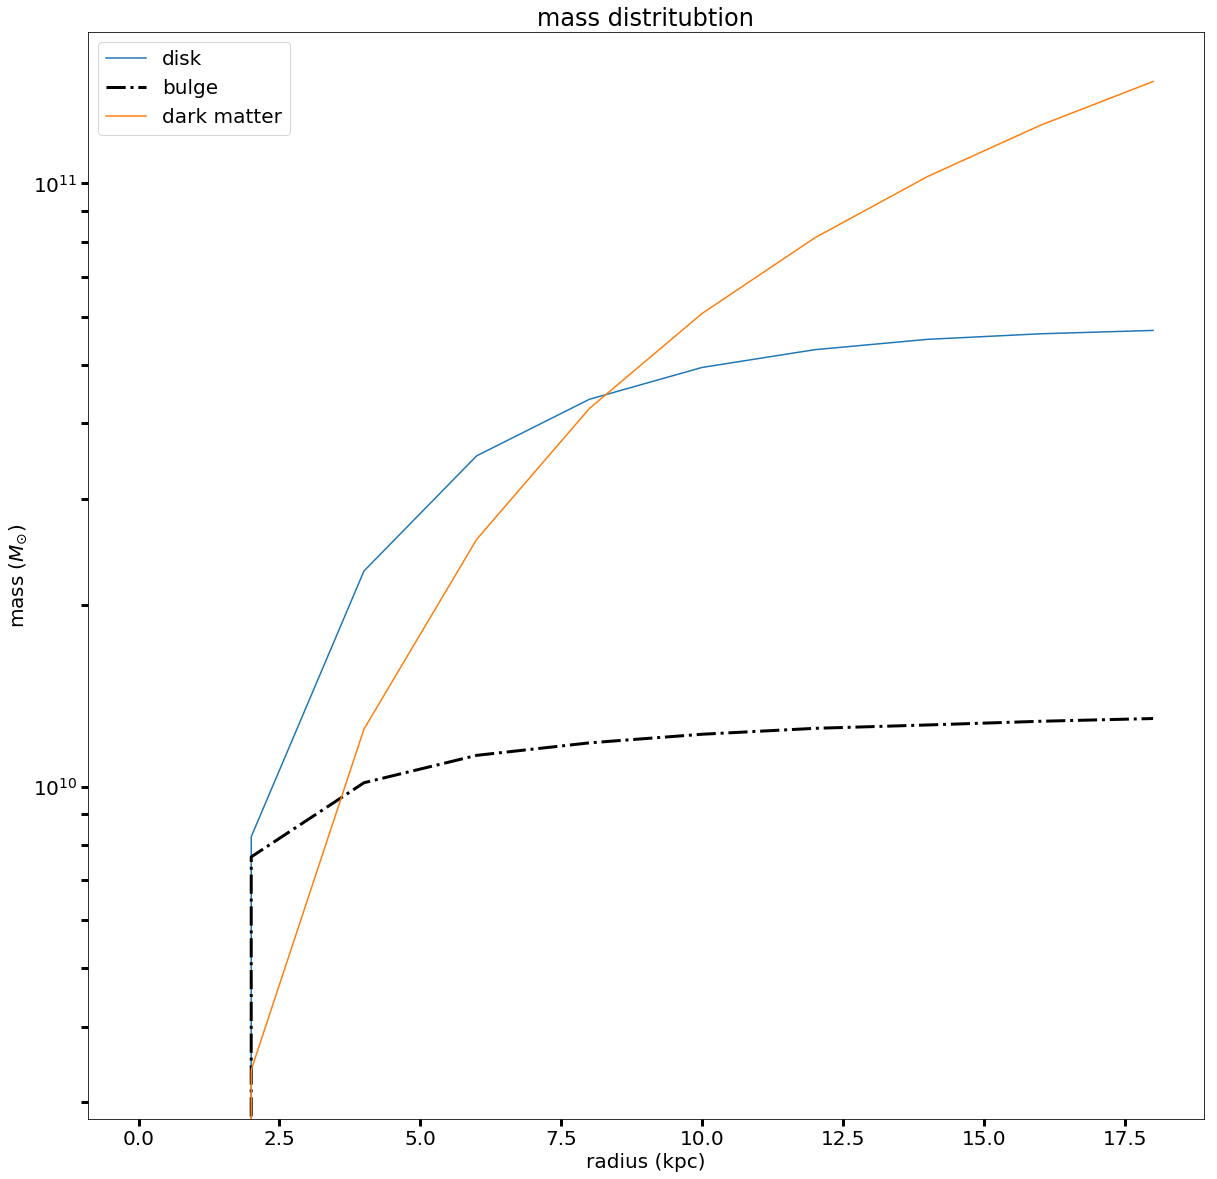

In [131]:
fig = plt.figure(figsize=(20,20))
plt.semilogy(r,m, label="disk")
plt.semilogy(rb, mb, label="bulge", lw=3, linestyle='-.', color='black')
#play with line style, color, line width
plt.semilogy(rdm, mdm, label="dark matter")
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass ($M_{\odot}$)') 
plt.xlabel('radius (kpc)')
plt.legend()
plt.rcParams.update({'font.size': 20})
plt.tick_params(which = 'both', width = 3)
plt.tick_params(which = 'both', length = 7)


In [132]:
mdm100, rdm100 = MWCOM_HALO.mass_profile(100)

Text(0.5,0,'radius (kpc)')

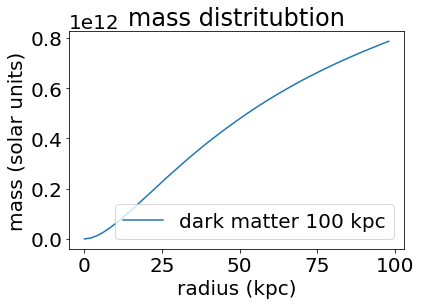

In [133]:
plt.plot(rdm100, mdm100, label="dark matter 100 kpc")
plt.legend()
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass (solar units)')
plt.xlabel('radius (kpc)')

In [134]:
mdm500, rdm500 = MWCOM_HALO.mass_profile(500, 10)

Text(0.5,0,'radius (kpc)')

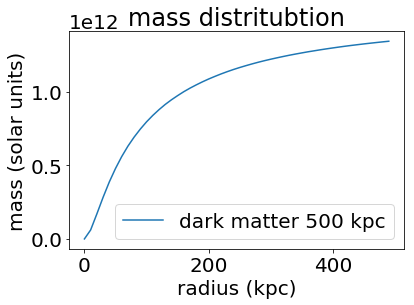

In [135]:
plt.plot(rdm500, mdm500, label = "dark matter 500 kpc")
plt.legend()
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass (solar units)')
plt.xlabel('radius (kpc)')

In [136]:
#testing velocity profile
np.sum(MWCOM.vel)
    
    

21451.875

In [137]:
MWCOM.vel_disk()

16009.43
22419.844
-16977.418


21451.875

In [138]:
r, v = MWCOM.vel_profile(40) 
rb, vb = MWCOM_BULGE.vel_profile(40)
rdm, vdm = MWCOM_HALO.vel_profile(40)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:124: RuntimeWarning: invalid value encountered in true_divide


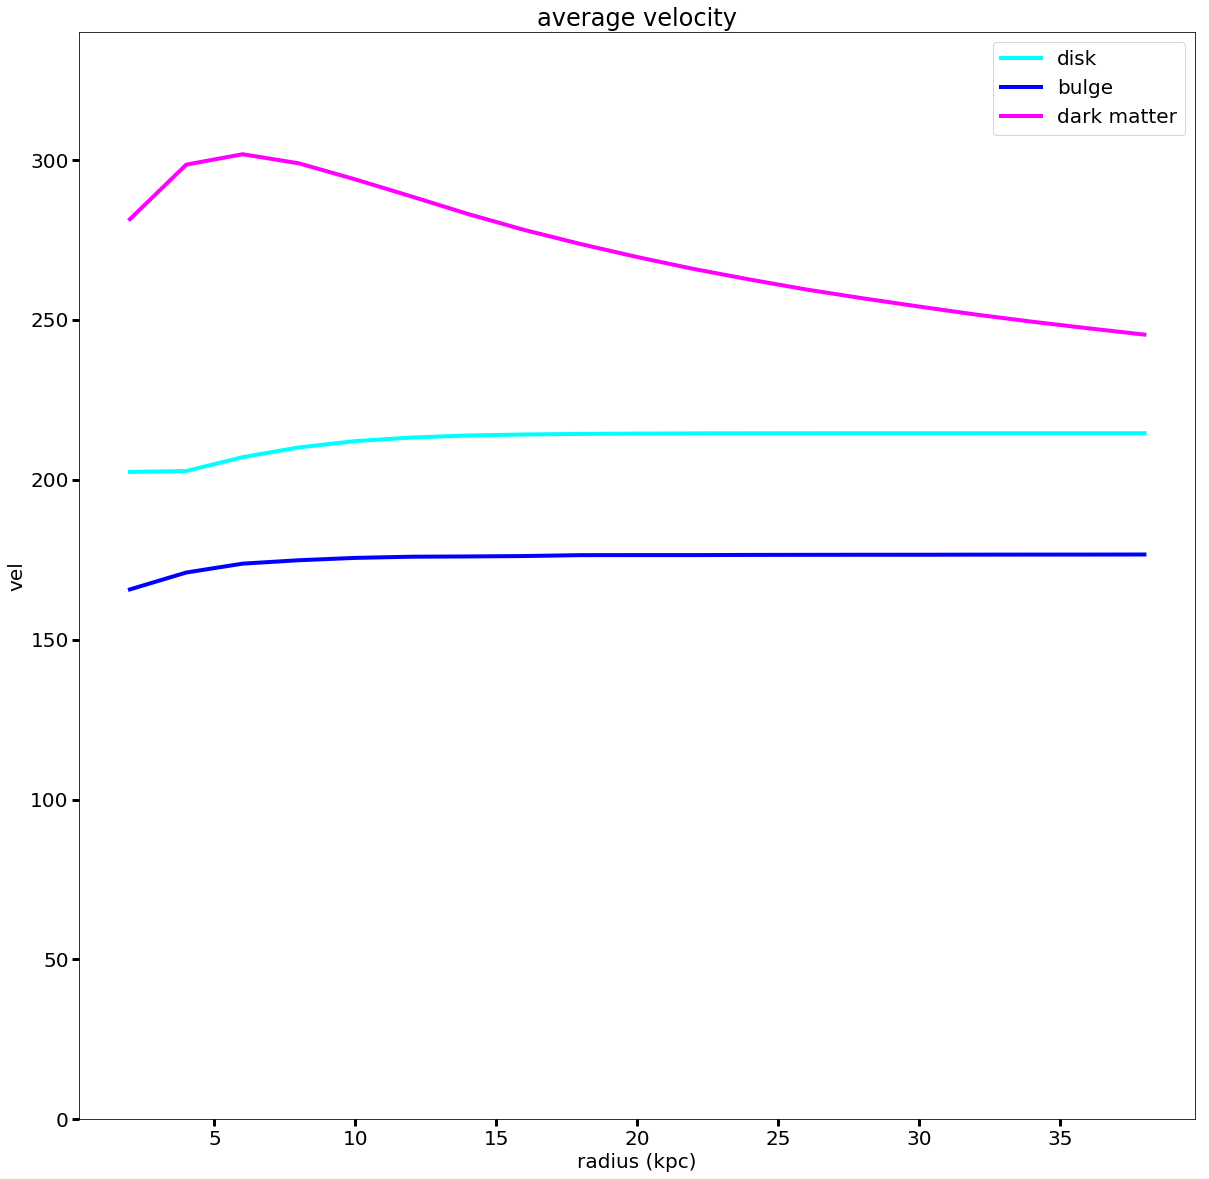

In [139]:

fig = plt.figure(figsize=(20,20))
plt.plot(r,v, label="disk", lw=4, linestyle='-', color='cyan')
plt.plot(rb, vb, label="bulge", lw=4, linestyle='-', color='blue')
plt.plot(rdm, vdm, label="dark matter", lw=4, linestyle='-', color='magenta')
plt.title('average velocity')
plt.axis()
plt.ylabel('vel') 
plt.xlabel('radius (kpc)')
plt.ylim(0, 340)
plt.legend()
plt.rcParams.update({'font.size': 20})
plt.tick_params(which = 'both', width = 3)
plt.tick_params(which = 'both', length = 7)

In [140]:
#clean this up
#determine from the mass profile the circular velocity for the 3 compare it  to the velocity profile
r, m = MWCOM.circ_vel(20) 
rb, mb = MWCOM_BULGE.circ_vel(20)
rdm, mdm = MWCOM_HALO.circ_vel(20)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


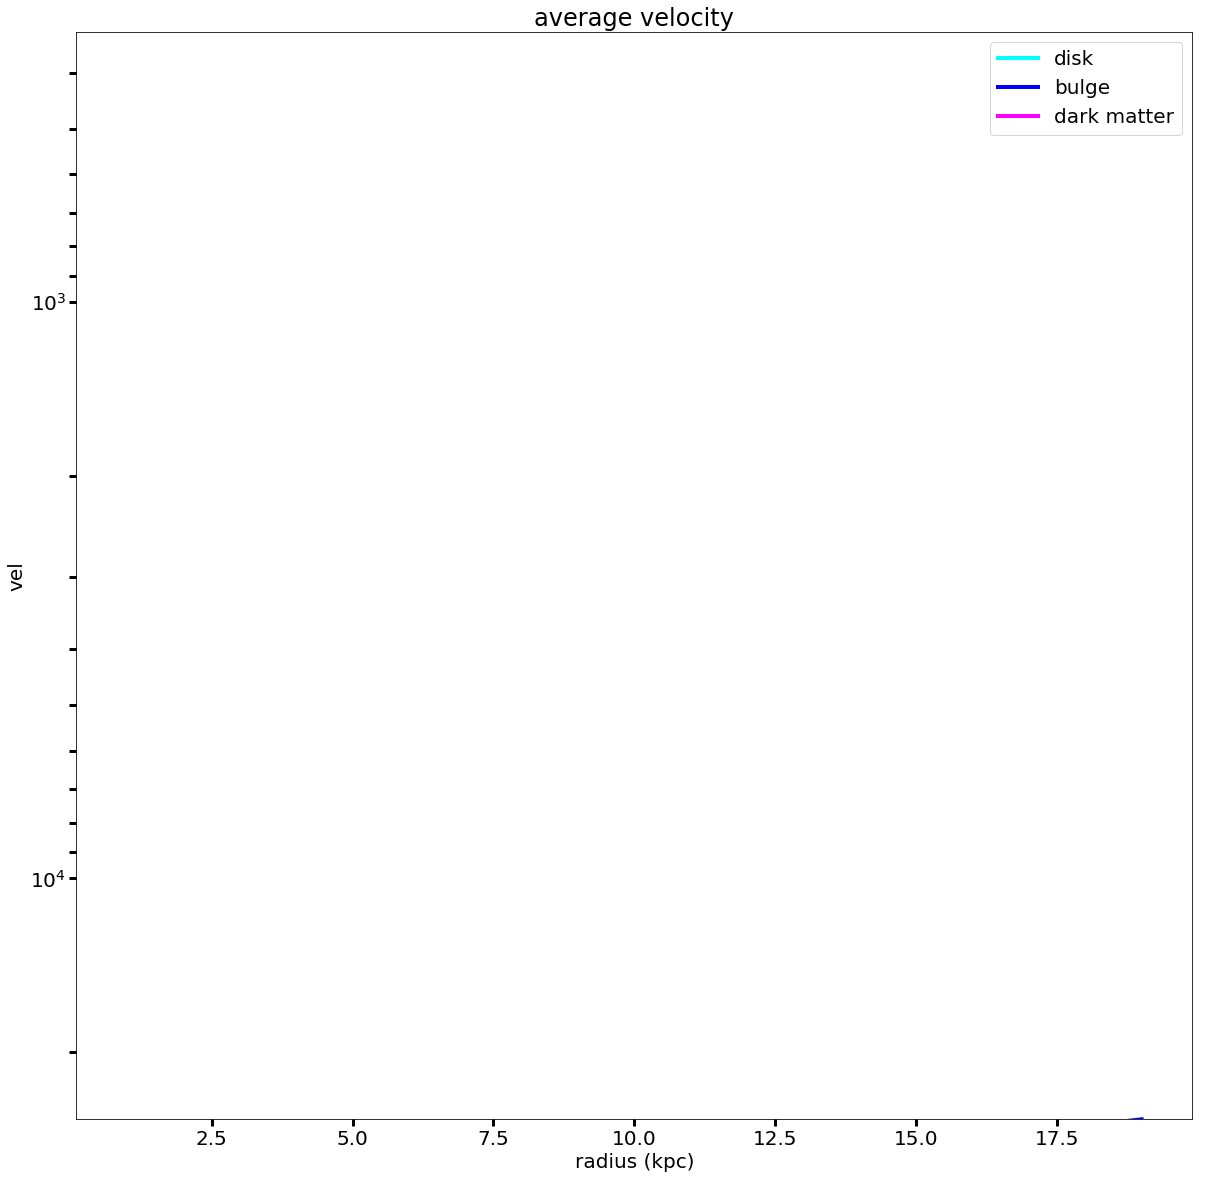

In [161]:
fig = plt.figure(figsize=(20,20))
plt.semilogy(r, m, label="disk", lw=4, linestyle='-', color='cyan')
plt.semilogy(rb, mb, label="bulge", lw=4, linestyle='-', color='blue')
plt.semilogy(rdm, mdm, label="dark matter", lw=4, linestyle='-', color='magenta')
plt.title('average velocity')
plt.axis()
plt.ylabel('vel') 
plt.xlabel('radius (kpc)')
plt.ylim(0, 340)
plt.legend()
plt.rcParams.update({'font.size': 20})
plt.tick_params(which = 'both', width = 3)
plt.tick_params(which = 'both', length = 7)